Modify the scratch code of PCA in our lecture:

- Modify so instead of using np.linalg.eigh, let's replace it with scratch code using SVD approach

(-2.914479864281029, 2.72728878056785, -0.428095936878651, 0.3395486490510208)

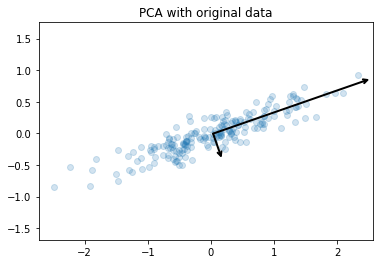

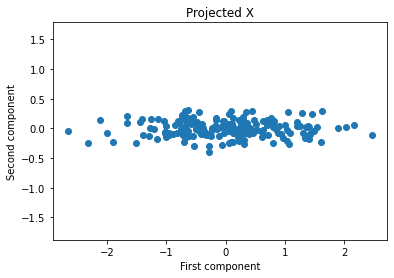

In [2]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

def custom_svd(X):
    U, S, VT = np.linalg.svd(X, full_matrices=True)
    eigenvalues = np.square(S)/(X.shape[0]-1)
    eigenvectors = VT.T
    
    #projected X = US
    #we need to pad zero for Sigma since m > n
    Sigma = np.zeros((X.shape[0], X.shape[1]), dtype=float)
    Sigma[:X.shape[1], :X.shape[1]] = np.diag(S)
    projected_X = U @ Sigma
    
    return eigenvalues, eigenvectors, projected_X

def PCA(X, n_components=2):
    #1. center the data (center the data, not features, thus axis=0)
    mean = np.mean(X, axis=0)
    X = (X - mean)
    
    #2. find covariance
    #the reason we can X.T @ X right away since we already 
    #center the data)
    #did not really use this variable
    cov = (X.T @ X) / (X.shape[0] - 1)
    
    #3. Then simply find the eigenvalues using np.linalg.eig 
    #by inputting the covariance matrix
    eigenvalues, eigenvectors, projected_X = custom_svd(X)

    #4. Your n'th principal components will be your first n'th eigenvectors with highest eigenvalues
    ix = np.argsort(eigenvalues)[::-1] #sort them from biggest to smallest thus -1

    if(n_components > eigenvalues.shape[0]):
        raise Exception("You cannot have n_components more than number of features!")
    else:
        eigenvalues, eigenvectors = eigenvalues[ix], eigenvectors[:, ix]
        #get the first nth components
        eigenvalues, eigenvectors = eigenvalues[:n_components], eigenvectors[:,:n_components]

    #define how much variance is gained after n' component
    variance_explained_ratio = np.cumsum(eigenvalues)/np.sum(eigenvalues)
    
    #return only n_components eigenvalues and vectors
    return eigenvalues, eigenvectors, mean, projected_X

#copy code from the lectures to plot the eigen values and vectors
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()  #get current axis
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

#main code
eigenvalues, eigenvectors, mean, projected_X = PCA(X, n_components=2)

#looking at the original graph with the loadings
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)

#.T so each row is eigenvector, so we can loop
for length, vector in zip(eigenvalues, eigenvectors):
    #loadings = eigenvector * (unit size) * sqrt (eigenvalue)
    #https://stats.stackexchange.com/questions/143905/loadings-vs-eigenvectors-in-pca-when-to-use-one-or-another
    v = vector * 3 *  np.sqrt(length)
    draw_vector(mean, mean + v)
plt.axis('equal')
plt.title('PCA with original data')

#projection
#you can see that lots of data in the second components is gone
plt.figure()
plt.scatter(projected_X[:, 0], projected_X[:, 1])
plt.xlabel("First component")
plt.ylabel("Second component")
plt.title("Projected X")
plt.axis('equal')